In [51]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [52]:
# load data and filter data
# forgot to split season bruh
pitchData = pd.read_csv("/Users/leofeingold/Desktop/fangraphs/pitch_design/fangraphs-leaderboards (4).csv").rename(columns = lambda x: x.lower())
fastballData = pitchData[["name", "team", "ip", "season", "age", "fa% (sc)", "vfa (sc)", "fa-x (sc)", "fa-z (sc)", "wfa/c (sc)", "stf+ fa", "mlbamid"]]
fastballData.head()

,name,team,ip,season,age,fa% (sc),vfa (sc),fa-x (sc),fa-z (sc),wfa/c (sc),stf+ fa,mlbamid
0,Kodai Senga,NYM,166.1,2023,30,0.3708,95.646958,-5.115681,9.797198,0.236456,109.333237,673540
1,Zack Greinke,HOU,171.0,2021,37,0.4020,88.863510,-1.119643,9.711670,0.287481,83.336293,425844
2,Adam Wainwright,STL,206.1,2021,39,0.0945,89.027930,-1.370586,8.550931,-1.572390,78.110000,425794
3,Max Scherzer,- - -,179.1,2021,36,0.4667,94.297786,-7.021021,9.322729,1.526852,118.437271,453286
4,Charlie Morton,ATL,185.2,2021,37,0.3599,95.522791,-8.031404,7.336884,0.845020,91.684372,450203


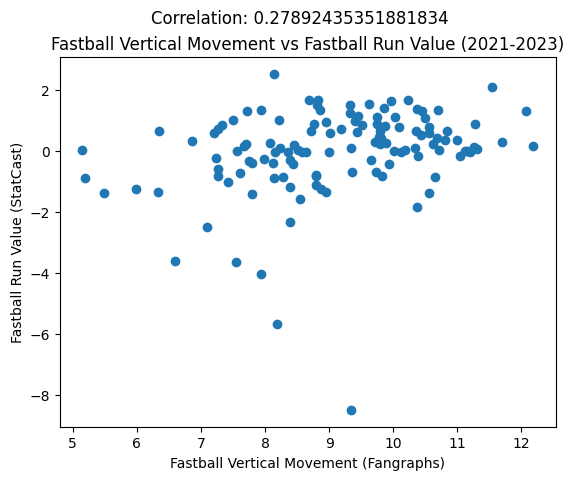

In [53]:
# looking at vertical movement
corr1 = fastballData["fa-z (sc)"].corr(fastballData["wfa/c (sc)"])
plt.scatter(fastballData["fa-z (sc)"], fastballData["wfa/c (sc)"])
plt.xlabel("Fastball Vertical Movement (Fangraphs)")
plt.ylabel("Fastball Run Value (StatCast)")
plt.title("Fastball Vertical Movement vs Fastball Run Value (2021-2023)")
plt.suptitle(f"Correlation: {corr1}")
plt.show()

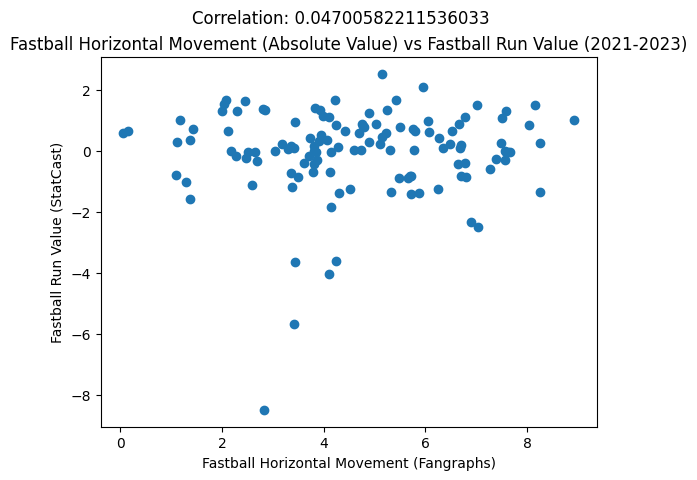

In [54]:
# looking at vertical movement
corr1 = abs(fastballData["fa-x (sc)"]).corr(fastballData["wfa/c (sc)"])
plt.scatter(abs(fastballData["fa-x (sc)"]), fastballData["wfa/c (sc)"])
plt.xlabel("Fastball Horizontal Movement (Fangraphs)")
plt.ylabel("Fastball Run Value (StatCast)")
plt.title("Fastball Horizontal Movement (Absolute Value) vs Fastball Run Value (2021-2023)")
plt.suptitle(f"Correlation: {corr1}")
plt.show()

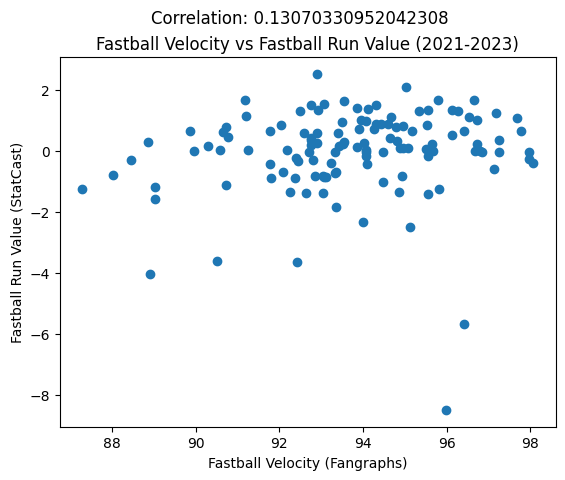

In [55]:
# looking at velocity
corr = fastballData["vfa (sc)"].corr(fastballData["wfa/c (sc)"])
plt.scatter(fastballData["vfa (sc)"], fastballData["wfa/c (sc)"])
plt.xlabel("Fastball Velocity (Fangraphs)")
plt.ylabel("Fastball Run Value (StatCast)")
plt.suptitle(f"Correlation: {corr}")
plt.title("Fastball Velocity vs Fastball Run Value (2021-2023)")
plt.show()

Text(0.5, 1.0, 'Fastball Velocity vs Fastball Vertical Movement (2021-2023)')

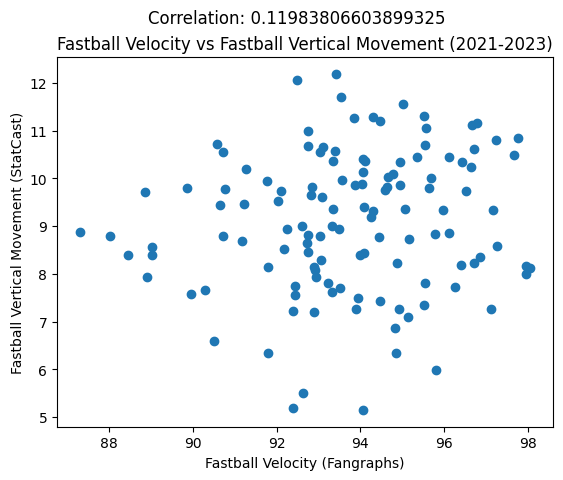

In [56]:
# looking at velocity and Z move
corr = fastballData["vfa (sc)"].corr(fastballData["fa-z (sc)"])
plt.scatter(fastballData["vfa (sc)"], fastballData["fa-z (sc)"])
plt.xlabel("Fastball Velocity (Fangraphs)")
plt.ylabel("Fastball Vertical Movement (StatCast)")
plt.suptitle(f"Correlation: {corr}")
plt.title("Fastball Velocity vs Fastball Vertical Movement (2021-2023)")
# plt.show()

In [57]:
# load savant data
savantData = pd.read_csv("/Users/leofeingold/Desktop/fangraphs/pitch_design/stats.csv").rename(columns = lambda x: x.lower())

# mask data
savantFastball = savantData[['last_name, first_name', 'player_id', 'year', 'woba', 'xwoba', 'ff_avg_speed', 'ff_avg_spin', 'ff_avg_break_x', 'ff_avg_break_z', 'ff_avg_break']]

# show data
savantFastball.head()

,"last_name, first_name",player_id,year,woba,xwoba,ff_avg_speed,ff_avg_spin,ff_avg_break_x,ff_avg_break_z,ff_avg_break
0,"Wainwright, Adam",425794,2021,0.273,0.302,89.0,2228.0,-1.9,-19.7,14.9
1,"Greinke, Zack",425844,2021,0.309,0.319,88.9,2234.0,-1.3,-18.0,16.7
2,"Hill, Rich",448179,2021,0.313,0.323,88.1,2339.0,9.2,-16.1,21.5
3,"Morton, Charlie",450203,2021,0.264,0.282,95.5,2340.0,-13.0,-17.5,18.2
4,"Lester, Jon",452657,2021,0.352,0.343,88.7,2172.0,5.0,-20.0,15.7


In [78]:
merged_df = pd.merge(fastballData, savantFastball, left_on=['mlbamid', 'season'], right_on=['player_id', 'year'], how='inner')
merged_df.head()

,name,team,ip,season,age,fa% (sc),vfa (sc),fa-x (sc),fa-z (sc),wfa/c (sc),...,"last_name, first_name",player_id,year,woba,xwoba,ff_avg_speed,ff_avg_spin,ff_avg_break_x,ff_avg_break_z,ff_avg_break
0,Kodai Senga,NYM,166.1,2023,30,0.3708,95.646958,-5.115681,9.797198,0.236456,...,"Senga, Kodai",673540,2023,0.282,0.304,95.6,2283.0,-8.0,-13.5,18.5
1,Zack Greinke,HOU,171.0,2021,37,0.4020,88.863510,-1.119643,9.711670,0.287481,...,"Greinke, Zack",425844,2021,0.309,0.319,88.9,2234.0,-1.3,-18.0,16.7
2,Adam Wainwright,STL,206.1,2021,39,0.0945,89.027930,-1.370586,8.550931,-1.572390,...,"Wainwright, Adam",425794,2021,0.273,0.302,89.0,2228.0,-1.9,-19.7,14.9
3,Max Scherzer,- - -,179.1,2021,36,0.4667,94.297786,-7.021021,9.322729,1.526852,...,"Scherzer, Max",453286,2021,0.248,0.263,94.3,2436.0,-10.6,-14.8,19.3
4,Charlie Morton,ATL,185.2,2021,37,0.3599,95.522791,-8.031404,7.336884,0.845020,...,"Morton, Charlie",450203,2021,0.264,0.282,95.5,2340.0,-13.0,-17.5,18.2


83


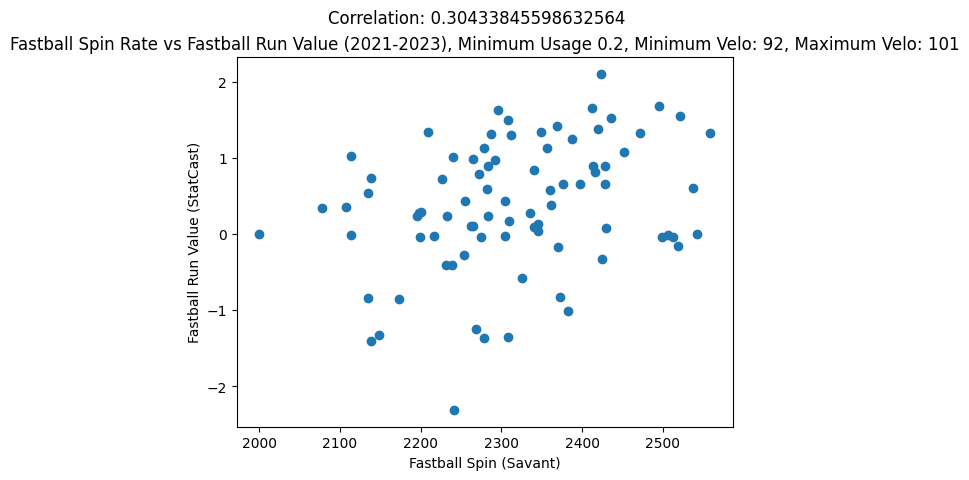

In [87]:
# looking at spin 
import mplcursors 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pitchData = pd.read_csv("/Users/leofeingold/Desktop/fangraphs/pitch_design/fangraphs-leaderboards (4).csv").rename(columns = lambda x: x.lower())
fastballData = pitchData[["name", "team", "ip", "season", "age", "fa% (sc)", "vfa (sc)", "fa-x (sc)", "fa-z (sc)", "wfa/c (sc)", "stf+ fa", "mlbamid"]]

savantData = pd.read_csv("/Users/leofeingold/Desktop/fangraphs/pitch_design/stats.csv").rename(columns = lambda x: x.lower())
savantFastball = savantData[['last_name, first_name', 'player_id', 'year', 'woba', 'xwoba', 'ff_avg_speed', 'ff_avg_spin', 'ff_avg_break_x', 'ff_avg_break_z', 'ff_avg_break']]


merged_df = pd.merge(fastballData, savantFastball, left_on=['mlbamid', 'season'], right_on=['player_id', 'year'], how='inner')

pitcher_names = merged_df['name']
seasons = merged_df['season']

minUsage = 0.2
minVelo = 92
maxVelo = 101
mask = (merged_df['fa% (sc)'] > minUsage) & (merged_df['vfa (sc)'] > minVelo) & (merged_df['vfa (sc)'] < maxVelo)
merged_df = merged_df[mask]
print(len(merged_df))

corr = merged_df["ff_avg_spin"].corr(merged_df["wfa/c (sc)"])
plt.scatter(merged_df["ff_avg_spin"], merged_df["wfa/c (sc)"])

cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
   f"Pitcher: {pitcher_names[sel.target.index]}\nSeason: {seasons[sel.target.index]}"
))

plt.xlabel("Fastball Spin (Savant)")
plt.ylabel("Fastball Run Value (StatCast)")
plt.suptitle(f"Correlation: {corr}")
plt.title(f"Fastball Spin Rate vs Fastball Run Value (2021-2023), Minimum Usage {minUsage}, Minimum Velo: {minVelo}, Maximum Velo: {maxVelo}")
plt.show()

In [88]:
merged_df.columns


Index(['name', 'team', 'ip', 'season', 'age', 'fa% (sc)', 'vfa (sc)',
       'fa-x (sc)', 'fa-z (sc)', 'wfa/c (sc)', 'stf+ fa', 'mlbamid',
       'last_name, first_name', 'player_id', 'year', 'woba', 'xwoba',
       'ff_avg_speed', 'ff_avg_spin', 'ff_avg_break_x', 'ff_avg_break_z',
       'ff_avg_break'],
      dtype='object')